# **Covid -19**

## *1. Importing Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## *2. Reading the data.*

In [3]:
file1 = pd.read_csv('./WHO-COVID-19-global-table-data.csv')

In [4]:
file1

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Kyrgyzstan,Europe,88953.0,1363.0,NaN,NaN,NaN,1024.0,16.0,NaN,NaN,NaN
1,Côte d'Ivoire,Africa,88425.0,335.0,NaN,NaN,NaN,835.0,3.0,NaN,NaN,NaN
2,Guadeloupe,NaN,203235.0,50793.0,NaN,NaN,NaN,1021.0,255.0,NaN,NaN,NaN
3,El Salvador,Americas,201865.0,3112.0,NaN,NaN,NaN,4230.0,65.0,NaN,NaN,NaN
4,Guernsey,NaN,35326.0,54796.0,NaN,NaN,NaN,67.0,104.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
236,Seychelles,Africa,51694.0,52563.0,8.0,8.0,8.0,172.0,175.0,NaN,NaN,NaN
237,Kiribati,Western Pacific,5085.0,4257.0,NaN,NaN,NaN,24.0,20.0,NaN,NaN,NaN
238,Saint Lucia,Americas,30252.0,16475.0,NaN,NaN,NaN,410.0,223.0,NaN,NaN,NaN
239,Malta,Europe,121437.0,23600.0,10.0,2.0,10.0,906.0,176.0,1.0,NaN,1.0


| **`Column Name`**                                     | **Description**                                                            |
|---------------------------------------------------|------------------------------------------------------------------------|
| `Name`                                            | Country or Region Name                                                 |
| `WHO Region`                                      | World Health Organization Region                                        |
| `Cases - cumulative total`                       | Total number of COVID-19 cases reported                                |
| `Cases - cumulative total per 100000 population` | Total number of COVID-19 cases reported per 100,000 population         |
| `Cases - newly reported in last 7 days`          | Number of new COVID-19 cases reported in the last 7 days               |
| `Cases - newly reported in last 7 days per 100000 population` | Number of new COVID-19 cases reported in the last 7 days per 100,000 population |
| `Cases - newly reported in last 24 hours`        | Number of new COVID-19 cases reported in the last 24 hours             |
| `Deaths - cumulative total`                      | Total number of COVID-19 deaths reported                               |
| `Deaths - cumulative total per 100000 population`| Total number of COVID-19 deaths reported per 100,000 population        |
| `Deaths - newly reported in last 7 days`         | Number of new COVID-19 deaths reported in the last 7 days              |
| `Deaths - newly reported in last 7 days per 100000 population` | Number of new COVID-19 deaths reported in the last 7 days per 100,000 population |
| `Deaths - newly reported in last 24 hours`       | Number of new COVID-19 deaths reported in the last 24 hours            |


## 3.Data Cleaning

### 3.1 Duplicate Values

In [5]:
file1.duplicated().sum()

0

### 3.2 Missing Values

In [6]:
file1.isna().sum()

Name                                                              0
WHO Region                                                       19
Cases - cumulative total                                          0
Cases - cumulative total per 100000 population                    9
Cases - newly reported in last 7 days                           168
Cases - newly reported in last 7 days per 100000 population     211
Cases - newly reported in last 24 hours                         168
Deaths - cumulative total                                         0
Deaths - cumulative total per 100000 population                  16
Deaths - newly reported in last 7 days                          224
Deaths - newly reported in last 7 days per 100000 population    241
Deaths - newly reported in last 24 hours                        224
dtype: int64

In [7]:
# Let's consider the who region singly and all other columns as one.


# Regions with no Who region
file1[file1['WHO Region'].isna()]['Name']

2                       Guadeloupe
4                         Guernsey
8                           Global
11                        Holy See
22                         Réunion
50                   French Guiana
52                Saint Barthélemy
56                      Martinique
57                   Liechtenstein
61                     Isle of Man
63                   Faroe Islands
71                       Gibraltar
108                         Jersey
109                        Mayotte
122     Saint Martin (French part)
131                   Saint Helena
217                       Pitcairn
224      Saint Pierre and Miquelon
226    Falkland Islands (Malvinas)
Name: Name, dtype: object

In [9]:
# Giving these regions "Special Cases and Remote Territories."

file1['WHO Region'].fillna('Special Cases and Remote Territories', inplace=True)

In [12]:
# All othere columns can be filled with 0 as they nan values indicate zero.

file1.iloc[:, 2:] = file1.iloc[:, 2:].fillna(0)

In [13]:
file1.isna().sum()

Name                                                            0
WHO Region                                                      0
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

## EDA

In [16]:
# Number of countries in the data.
print(file1['Name'].nunique())

# Names of those countries.
# print(file1['Name'].unique())


241


In [18]:
# Number of WHO regions
print(file1['WHO Region'].nunique())

# WHO regions
print(file1['WHO Region'].unique())

8
['Europe' 'Africa' 'Special Cases and Remote Territories' 'Americas'
 'Western Pacific' 'Eastern Mediterranean' 'Other' 'South-East Asia']


In [32]:
# Total number of cases reported in WHO Region

file1.groupby(['WHO Region'])['Cases - cumulative total'].sum()

WHO Region
Africa                                    9040918.0
Americas                                192835040.0
Eastern Mediterranean                    23417911.0
Europe                                  279151934.0
Other                                         764.0
South-East Asia                          61286952.0
Special Cases and Remote Territories    776791466.0
Western Pacific                         208437670.0
Name: Cases - cumulative total, dtype: float64

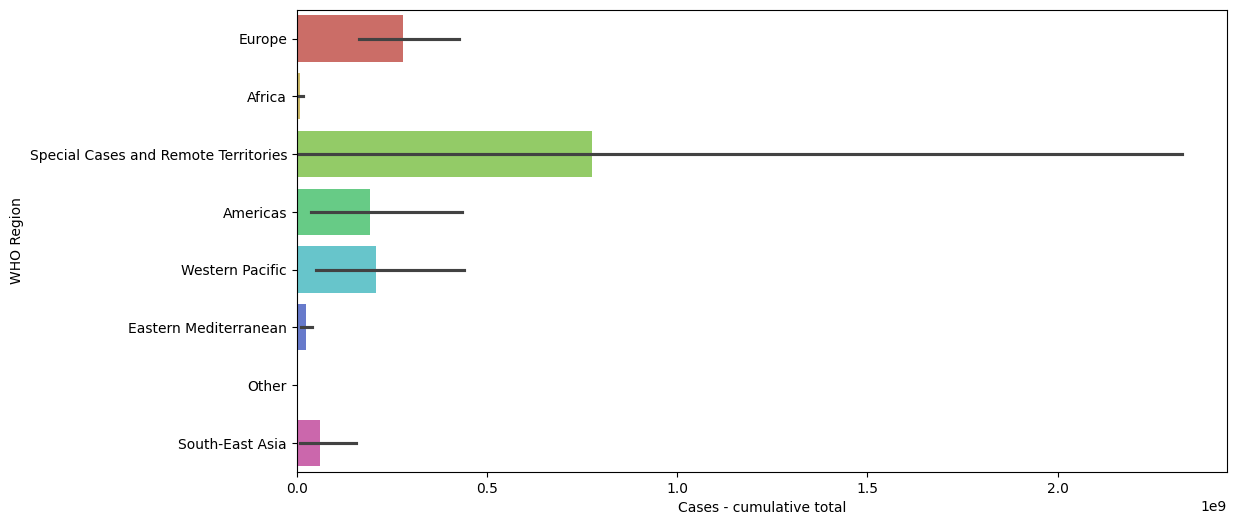

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Cases - cumulative total', data = file1, y = 'WHO Region', hue = 'WHO Region', palette='hls', estimator=sum)
plt.show()

In [27]:
file1.groupby(['WHO Region'])['Cases - newly reported in last 24 hours'].sum()

WHO Region
Africa                                    149.0
Americas                                 1763.0
Eastern Mediterranean                       0.0
Europe                                  16755.0
Other                                       0.0
South-East Asia                          2834.0
Special Cases and Remote Territories    32524.0
Western Pacific                         11023.0
Name: Cases - newly reported in last 24 hours, dtype: float64

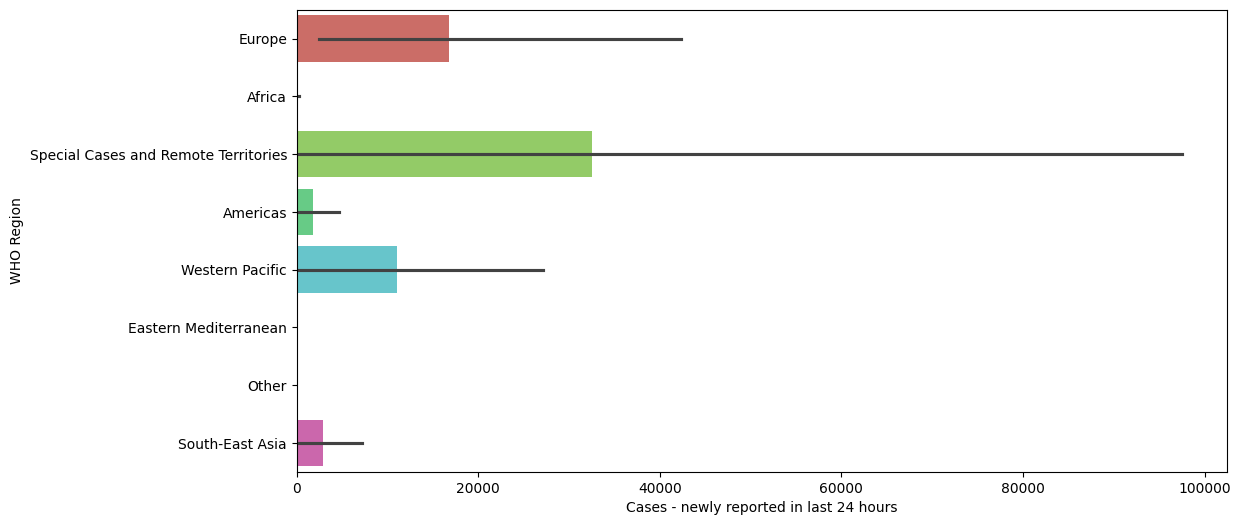

In [30]:
# Cases on each WHO Region on last 24 hours.

plt.figure(figsize=(12, 6))
sns.barplot(x = 'Cases - newly reported in last 24 hours', data = file1, y = 'WHO Region', hue = 'WHO Region', palette='hls', estimator=sum)
plt.show()

In [29]:
file1.groupby(['WHO Region'])['Cases - newly reported in last 24 hours'].mean()

WHO Region
Africa                                     3.170213
Americas                                  37.510638
Eastern Mediterranean                      0.000000
Europe                                   304.636364
Other                                      0.000000
South-East Asia                          257.636364
Special Cases and Remote Territories    1711.789474
Western Pacific                          324.205882
Name: Cases - newly reported in last 24 hours, dtype: float64

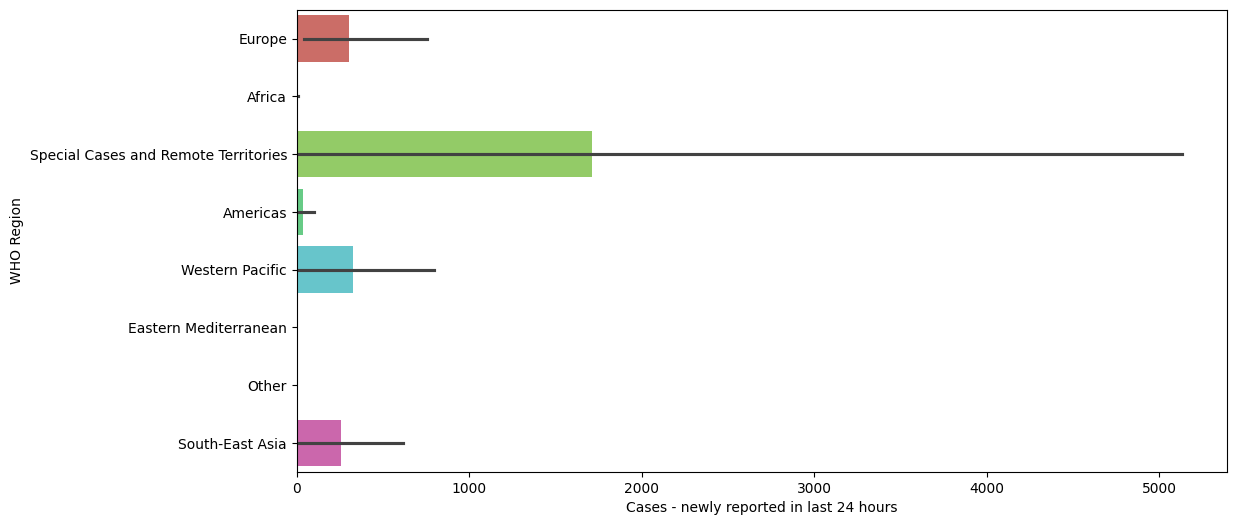

In [31]:
# Mean cases on each WHO Region on last 24 hours.

plt.figure(figsize=(12, 6))
sns.barplot(x = 'Cases - newly reported in last 24 hours', data = file1, y = 'WHO Region', hue = 'WHO Region', palette='hls')
plt.show()